In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv("emails.csv")

In [3]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [5]:
X = df.iloc[:,1:3001]  
X

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,0,1,0


In [6]:
Y = df.iloc[:,-1].values 
Y

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

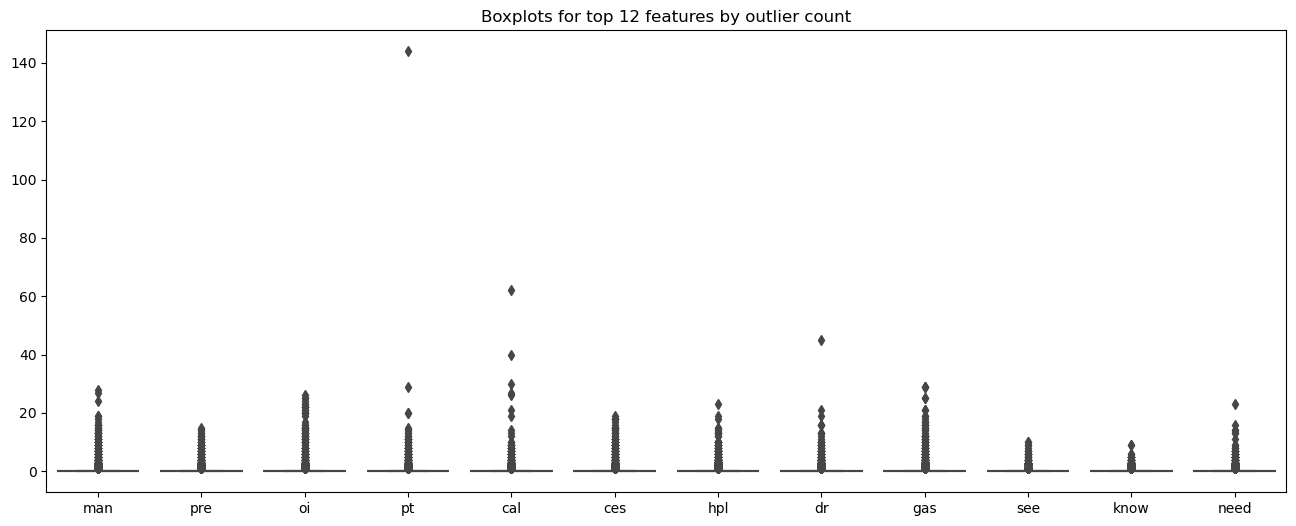

In [7]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
df_numeric = df[numeric_cols]

import matplotlib.pyplot as plt
import seaborn as sns

Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outlier_mask = ((df_numeric < lower) | (df_numeric > upper))
outlier_counts = outlier_mask.sum().sort_values(ascending=False)

topN = 12
top_features = outlier_counts.head(topN).index.tolist()

plt.figure(figsize=(16,6))
sns.boxplot(data=df_numeric[top_features])
plt.title(f"Boxplots for top {topN} features by outlier count")
plt.show()

In [8]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [9]:
from sklearn.metrics import classification_report, confusion_matrix

# -------- Support Vector Machine --------
svc = SVC(C=1.0, kernel='rbf', gamma='auto')
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

In [10]:
print("SVM Accuracy:", accuracy_score(y_test, svc_pred))
print("SVM Classification Report:\n", classification_report(y_test, svc_pred))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, svc_pred))

SVM Accuracy: 0.8932714617169374
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       913
           1       0.87      0.74      0.80       380

    accuracy                           0.89      1293
   macro avg       0.89      0.85      0.87      1293
weighted avg       0.89      0.89      0.89      1293

SVM Confusion Matrix:
 [[872  41]
 [ 97 283]]


In [11]:
# -------- K-Nearest Neighbors --------
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [12]:
print("KNN Accuracy:", knn.score(X_test, y_test))
print("KNN Classification Report:\n", classification_report(y_test, knn_pred))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, knn_pred))

KNN Accuracy: 0.8662026295436969
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90       913
           1       0.74      0.84      0.79       380

    accuracy                           0.87      1293
   macro avg       0.83      0.86      0.85      1293
weighted avg       0.87      0.87      0.87      1293

KNN Confusion Matrix:
 [[799 114]
 [ 59 321]]


In [20]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)
X_test_df = pd.DataFrame(X_test_s)

ks = [1, 3, 5] 

results = {}
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(X_train_s, y_train)              # X_train_s must be scaled features
    y_pred = knn.predict(X_test_df)          # X_test_s must be scaled features

    acc = accuracy_score(y_test, y_pred)
    cm  = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=0)

    results[k] = acc

    print(f"\nK = {k}:")
    print(f"  Accuracy = {acc:.4f}")
    print("  Confusion Matrix:")
    print(cm)
    print("  Classification Report:")
    print(report)


AttributeError: 'NoneType' object has no attribute 'split'